**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Find IRF](#toc2_)    
- 3. [Figures](#toc3_)    
  - 3.1. [Sensitivity analysis wrt export persistence](#toc3_1_)    
    - 3.1.1. [Effect on Foreign Economy and Prices](#toc3_1_1_)    
  - 3.2. [National accouting - quantities](#toc3_2_)    
  - 3.3. [National accouting - prices](#toc3_3_)    
  - 3.4. [Labor market](#toc3_4_)    
  - 3.5. [Capital accumulation](#toc3_5_)    
  - 3.6. [Production firms](#toc3_6_)    
  - 3.7. [Phillips curve](#toc3_7_)    
  - 3.8. [Government](#toc3_8_)    
  - 3.9. [Households - aggregate](#toc3_9_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# Export shock - further comments

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt   
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = BabyMAKROModelClass(name='baseline') 

**Unpack namespaces:**

In [3]:
par = model.par                 
ss = model.ss                   
sol = model.sol                 

**Define sensitivity parameter and values:**

In [4]:
parameter = 'gamma_X'                                   # set parameter 
parvalues = [0.0,0.5,0.75]                              # set parameter values
models = model.multi_model(parameter,parvalues)         # create one model for each value

model compiled, 1.0 mins 24 secs
Jacobian calculated in 4.9 secs
model compiled, 0.1 secs
Jacobian calculated in 5.0 secs
model compiled, 0.1 secs
Jacobian calculated in 4.9 secs


## 2. <a id='toc2_'></a>[Find IRF](#toc0_)

**Define shock:**

In [5]:
Tshock = 50                                                 # length of shock
persistence = np.array([0.80**np.arange(Tshock)])           # persistence of shock       
persistence = persistence.reshape((Tshock,1)) 
price_shock = 0.005                                         # size of shock

**Find IRF:**

In [6]:
for model_ in models:

    model_.set_exo_ss()                                                            
    model_.set_unknowns_ss()                                                        

    model_.sol.chi[:Tshock,:] = model_.ss.chi*(1 + 2*price_shock*persistence)         # shock to foreign demand shifter
    model_.sol.P_F[:Tshock,:] = model_.ss.P_F*(1 + price_shock*persistence)           # shock to foreign prices
    model_.sol.P_M_C[:Tshock,:] = model_.ss.P_M_C*(1 + price_shock*persistence)       # shock to consumption import prices
    model_.sol.P_M_G[:Tshock,:] = model_.ss.P_M_G*(1 + price_shock*persistence)       # shock to government consumption import prices
    model_.sol.P_M_I[:Tshock,:] = model_.ss.P_M_I*(1 + price_shock*persistence)       # shock to investment import prices
    model_.sol.P_M_X[:Tshock,:] = model_.ss.P_M_X*(1 + price_shock*persistence)       # shock to export import prices

    model_.find_IRF()                                                               


initial:
t1-t0 = 0.06884 secs
it = 5
    max. abs. error = 8.60e-11
    3.06e-12 in A_R_ini_error
    1.19e-13 in Aq_diff
    9.81e-14 in FOC_capital_agency
    7.89e-11 in FOC_K_ell
    8.60e-11 in mkt_clearing
    9.54e-12 in PC

solve: t1-t0 = 0.12116 secs
evaluate + update: t3-t2 = 0.10164 secs
initial:
t1-t0 = 0.07097 secs
it = 5
    max. abs. error = 9.02e-12
    5.21e-13 in A_R_ini_error
    1.83e-14 in Aq_diff
    5.35e-14 in FOC_capital_agency
    9.02e-12 in FOC_K_ell
    4.15e-12 in mkt_clearing
    2.47e-13 in PC

solve: t1-t0 = 0.12665 secs
evaluate + update: t3-t2 = 0.10641 secs
initial:
t1-t0 = 0.07049 secs
it = 5
    max. abs. error = 2.74e-12
    1.01e-13 in A_R_ini_error
    1.95e-15 in Aq_diff
    1.33e-14 in FOC_capital_agency
    1.98e-12 in FOC_K_ell
    2.74e-12 in mkt_clearing
    2.17e-13 in PC

solve: t1-t0 = 0.12695 secs
evaluate + update: t3-t2 = 0.11914 secs


## 3. <a id='toc3_'></a>[Figures](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Sensitivity analysis wrt export persistence](#toc0_)

#### 3.1.1. <a id='toc3_1_1_'></a>[Effect on Foreign Economy and Prices](#toc0_)

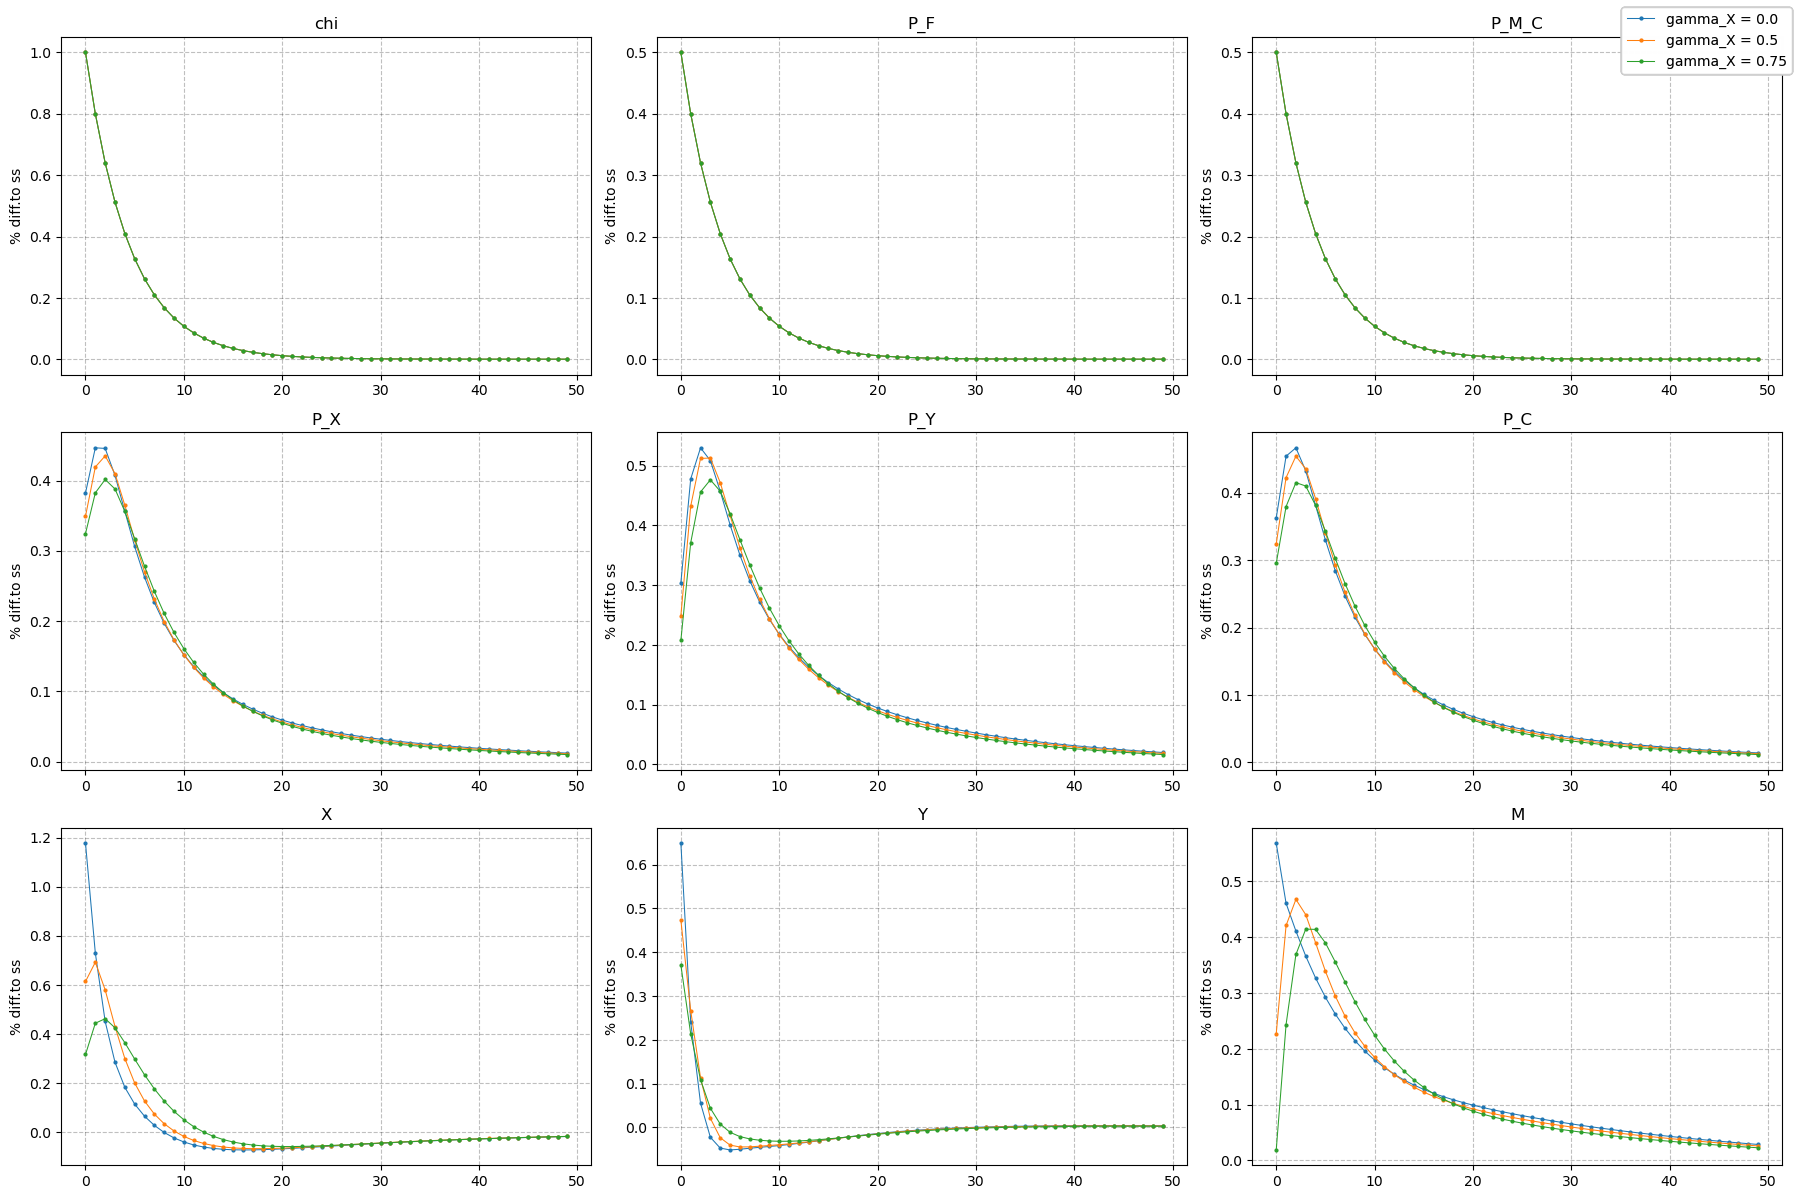

In [7]:
model.plot_IRF_models(models,parameter,varlist=['chi','P_F','P_M_C','P_X','P_Y','P_C','X','Y','M'])

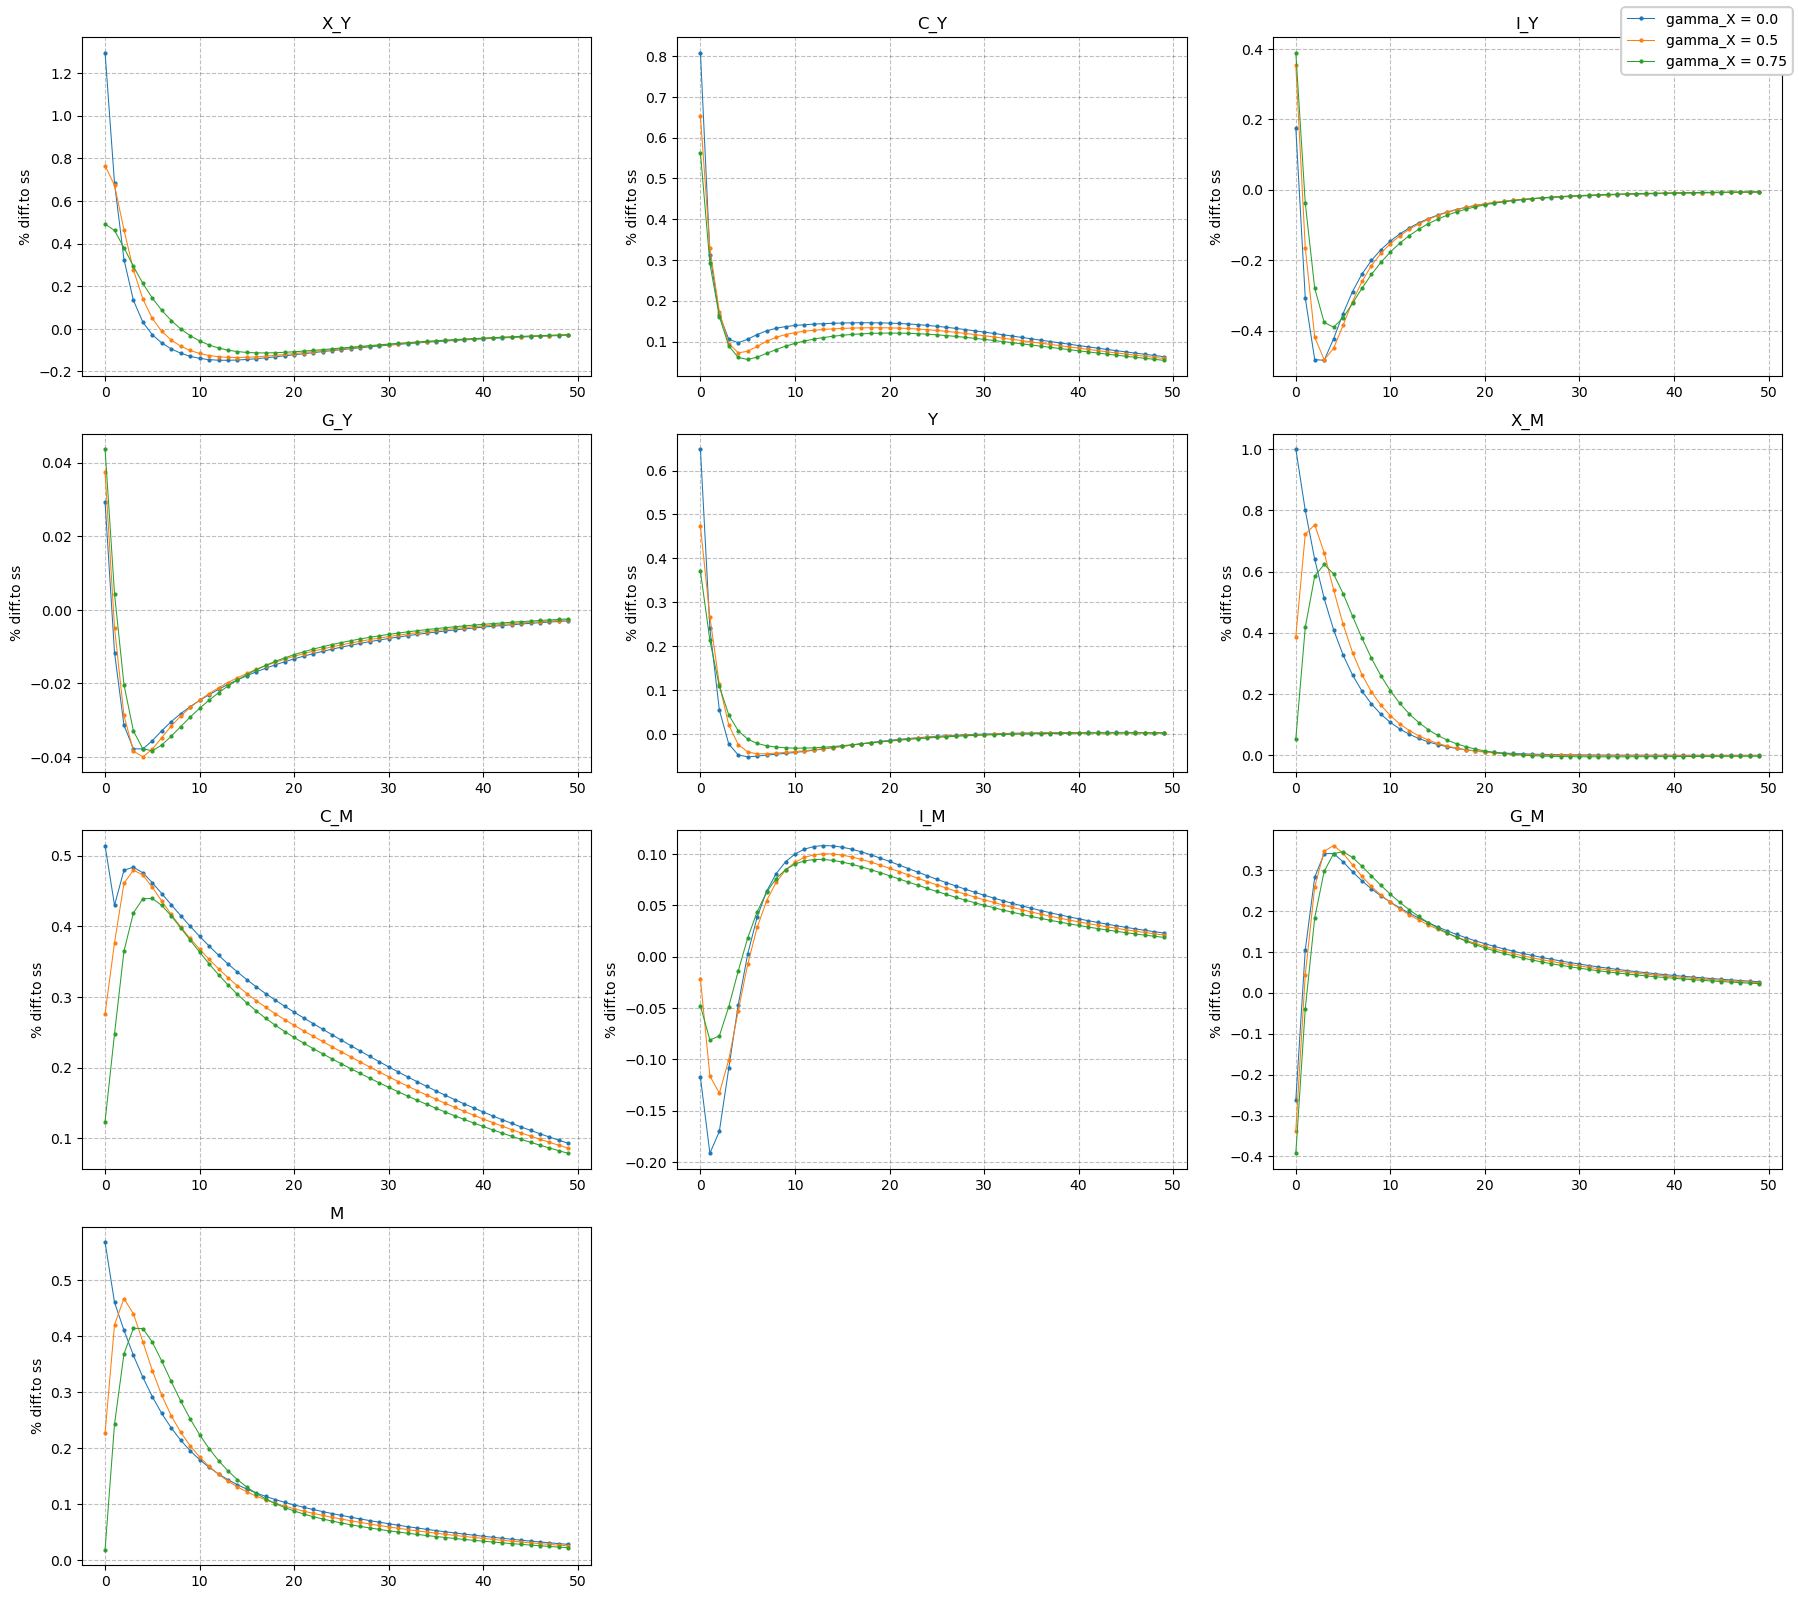

In [8]:
model.plot_IRF_models(models,parameter,varlist=['X_Y','C_Y','I_Y','G_Y','Y','X_M','C_M','I_M','G_M','M'])